In [1]:
import requests
from flask import jsonify
import pandas as pd
#URL = "http://159.65.158.4:7000/case-intake-structured-proc"
URL = "https://api.covid19india.org/raw_data.json"
from tqdm import tqdm
import plotly.express as px
import numpy as np

In [25]:
r = requests.get(url = URL)
try:
    d = r.json()
except:
    d = r.text
    
#variables in the file
agebracket = []
backupnotes = []
contractedfromwhichpatientsuspected = []
currentstatus = []
dateannounced = []
detectedcity = []
detecteddistrict = []
detectedstate = []
estimatedonsetdate = []
gender = []
nationality = []
notes = []
patientnumber = []
source1 = []
source2 = []
source3 = []
statecode = []
statepatientnumber = []
statuschangedate = []
typeoftransmission = []

for ee in tqdm(d['raw_data']):
    agebracket.append(ee['agebracket'])
    backupnotes.append(ee['backupnotes'])
    contractedfromwhichpatientsuspected.append(ee['contractedfromwhichpatientsuspected'])
    currentstatus.append(ee['currentstatus'])
    dateannounced.append(ee['dateannounced'])
    detectedcity.append(ee['detectedcity'])
    detecteddistrict.append(ee['detecteddistrict'])
    detectedstate.append(ee['detectedstate'])
    estimatedonsetdate.append(ee['estimatedonsetdate'])
    gender.append(ee['gender'])
    nationality.append(ee['nationality'])
    notes.append(ee['notes'])
    patientnumber.append(ee['patientnumber'])
    source1.append(ee['source1'])
    source2.append(ee['source2'])
    source3.append(ee['source3'])
    statecode.append(ee['statecode'])
    statepatientnumber.append(ee['statepatientnumber'])
    statuschangedate.append(ee['statuschangedate'])
    typeoftransmission.append(ee['typeoftransmission'])
df = pd.DataFrame()
df['agebracket'] = agebracket
df['backupnotes'] = backupnotes
df['contractedfromwhichpatientsuspected'] = contractedfromwhichpatientsuspected
df['currentstatus'] = currentstatus
df['dateannounced'] = dateannounced
df['detectedcity'] = detectedcity
df['detecteddistrict'] = detecteddistrict
df['detectedstate'] = detectedstate
df['estimatedonsetdate'] = estimatedonsetdate
df['gender'] = gender
df['nationality'] = nationality
df['notes'] = notes
df['patientnumber'] = patientnumber
df['source1'] = source1
df['source2'] = source2
df['source3'] = source3
df['statecode'] = statecode
df['statepatientnumber'] = statepatientnumber
df['statuschangedate'] = statuschangedate
df['statuschangedate']= pd.to_datetime(df['statuschangedate'])
df['typeoftransmission'] = typeoftransmission
df.loc[df['dateannounced']=='', 'dateannounced'] = '01/01/2000'
df['dateannounced']= pd.to_datetime(df['dateannounced'], format='%d/%m/%Y')
#df['weekannounced'] = df['dateannounced'].dt.week
df['week_year'] = df['dateannounced'].dt.strftime('%Y, Week %W')
df.to_csv('updated_file.csv', index = False)

100%|████████████████████████████████████████████████████████████████████████| 11040/11040 [00:00<00:00, 302485.70it/s]


In [26]:
df = pd.read_csv('updated_file.csv')
df.head()

,agebracket,backupnotes,contractedfromwhichpatientsuspected,currentstatus,dateannounced,detectedcity,detecteddistrict,detectedstate,estimatedonsetdate,gender,...,notes,patientnumber,source1,source2,source3,statecode,statepatientnumber,statuschangedate,typeoftransmission,week_year
0,20,Student from Wuhan,NaN,Recovered,2020-01-30,Thrissur,Thrissur,Kerala,NaN,F,...,Travelled from Wuhan,1,https://twitter.com/vijayanpinarayi/status/1222819465143832577,https://weather.com/en-IN/india/news/news/2020-02-14-kerala-defeats-coronavirus-indias-three-covid-19-patients-successfully,NaN,KL,KL-TS-P1,2020-02-14,Imported,"2020, Week 04"
1,NaN,Student from Wuhan,NaN,Recovered,2020-02-02,Alappuzha,Alappuzha,Kerala,NaN,NaN,...,Travelled from Wuhan,2,https://www.indiatoday.in/india/story/kerala-reports-second-case-of-coronavirus-1642494-2020-02-02,https://weather.com/en-IN/india/news/news/2020-02-14-kerala-defeats-coronavirus-indias-three-covid-19-patients-successfully,NaN,KL,KL-AL-P1,2020-02-14,Imported,"2020, Week 04"
2,NaN,Student from Wuhan,NaN,Recovered,2020-02-03,Kasaragod,Kasaragod,Kerala,NaN,NaN,...,Travelled from Wuhan,3,https://www.indiatoday.in/india/story/kerala-now-confirms-third-case-of-coronavirus-1642789-2020-02-03,https://twitter.com/ANI/status/1224221485805395968?s=20,https://weather.com/en-IN/india/news/news/2020-02-14-kerala-defeats-coronavirus-indias-three-covid-19-patients-successfully,KL,KL-KS-P1,2020-02-14,Imported,"2020, Week 05"
3,45,Travel history to Italy and Austria,NaN,Recovered,2020-03-02,East Delhi (Mayur Vihar),East Delhi,Delhi,NaN,M,...,"Travelled from Austria, Italy",4,https://www.indiatoday.in/india/story/not-a-jail-delhi-s-1st-covid-19-patient-recalls-time-in-isolation-ward-has-this-one-tip-for-others-1656088-2020-03-16,https://economictimes.indiatimes.com/news/politics-and-nation/coronavirus-cases-in-india-live-news-latest-updates-mar2/liveblog/74432375.cms,NaN,DL,DL-P1,2020-03-15,Imported,"2020, Week 09"
4,24,"Travel history to Dubai, Singapore contact",NaN,Recovered,2020-03-02,Hyderabad,Hyderabad,Telangana,NaN,M,...,"Travelled from Dubai to Bangalore on 20th Feb, stayed there for 2 days and took a bus to Hyderabad",5,https://www.deccanherald.com/national/south/quarantine-not-a-jail-no-stigma-attached-telanganas-first-coronavirus-case-and-survivor-819012.html,https://www.indiatoday.in/india/story/coronavirus-in-india-tracking-country-s-first-50-covid-19-cases-what-numbers-tell-1654468-2020-03-12,https://www.thehindu.com/news/national/coronavirus-live-updates-march-14-2020/article31066969.ece,TG,TS-P1,2020-02-03,Imported,"2020, Week 09"


In [27]:
len(df)

11040

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

Hospitalized    10738
Recovered       167  
Deceased        32   
Migrated        1    
Name: currentstatus, dtype: int64
Maharashtra                    2455
Delhi                          1510
Tamil Nadu                     1204
Rajasthan                      969 
Uttar Pradesh                  657 
Gujarat                        617 
Madhya Pradesh                 614 
Telangana                      592 
Andhra Pradesh                 473 
Kerala                         386 
Jammu and Kashmir              278 
Karnataka                      258 
Haryana                        198 
West Bengal                    190 
Punjab                         184 
Bihar                          66  
Odisha                         60  
Uttarakhand                    35  
Chhattisgarh                   33  
Himachal Pradesh               32  
Assam                          31  
Jharkhand                      24  
Chandigarh                     21  
Ladakh                         17  
Andaman and Ni

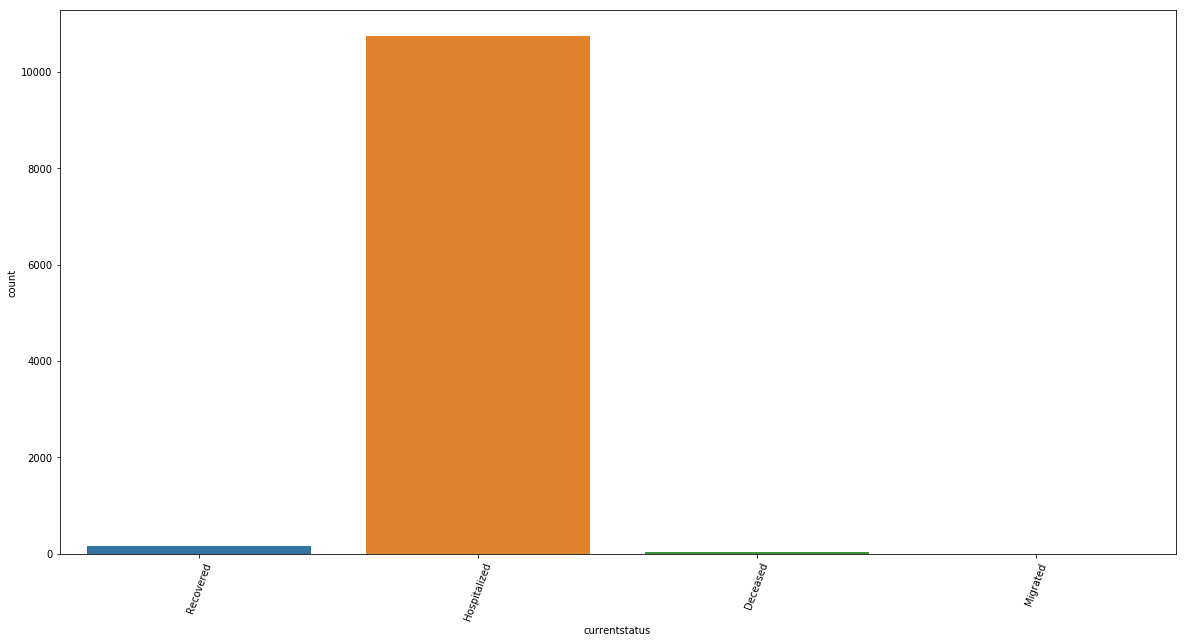

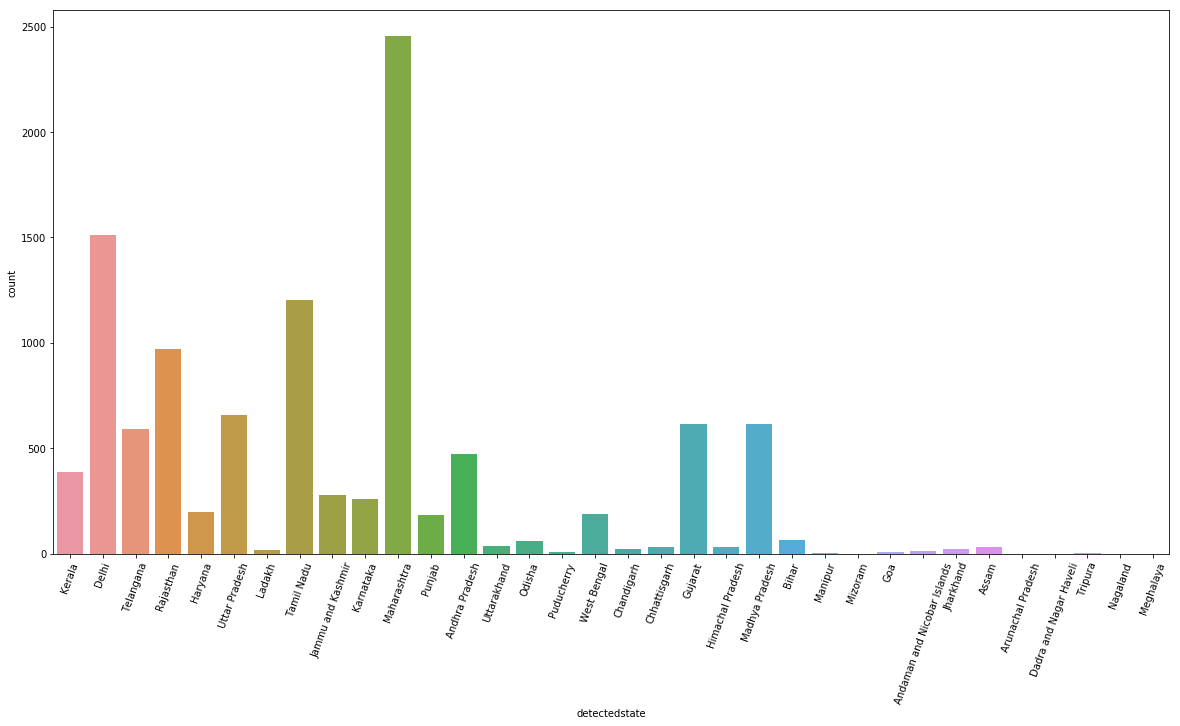

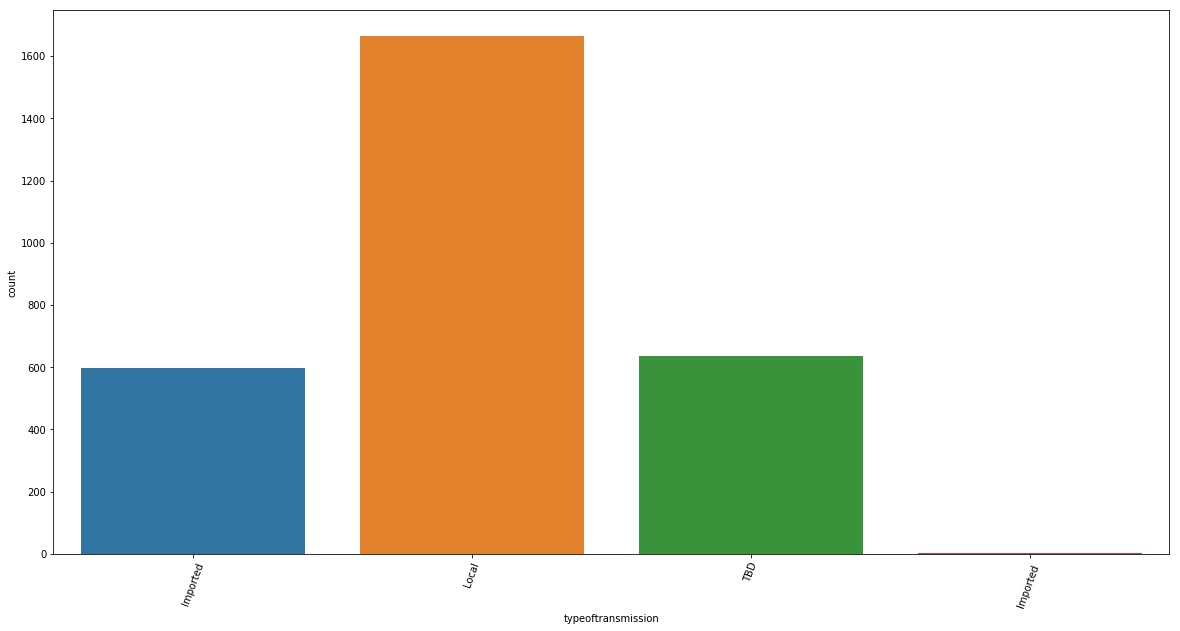

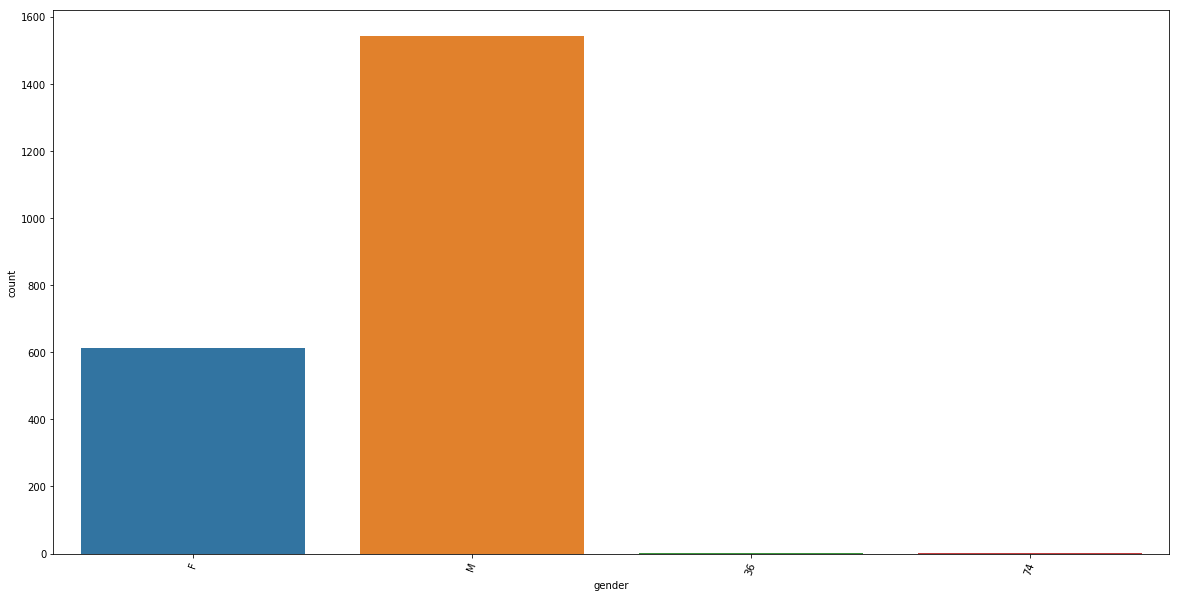

In [29]:
feats = ['currentstatus', 'detectedstate', 'typeoftransmission', 'gender']
for ef in feats:
    plt.figure(figsize=(20,10))
    plt.xticks(rotation=70)
    print(df[ef].value_counts())
    sns.countplot(x=ef, data=df)

In [30]:
#df1 = df['notes'].value_counts().rename_axis('unique_values').reset_index(name='counts')

In [31]:
df.loc[df['notes']=='', 'notes'] = 'NA'
keys = []
grouped_terms = {
    'travelled':'Travel', 'contact':'Contact','train':'Contact','airport':'Travel','sister':'Family','from':'Travel',
    'family':'Contact','friend':'Contact', 'relative':'Contact', 'son':'Contact','husband':'Contact','cousin':'Contact',
    'daughter':'Contact', 'wife':'Contact', 'father':'Contact', 'mother':'Contact','uncle':'Contact','neighbour':'Contact',
    'spouse':'Contact', 'details awaited':'Details Awaited', 'brother':'Contact','aunt':'Contact','tenant':'Tenant',
         'cook':'Contact','doctor':'Govt Staff','staff':'Contact','boss':'Contact','roommate':'Contact','parent':'Family',
    'passenger':'Contact','driver':'Contact','work':'Contact','travel history':'Travel',
    'tourist':'Travel','indonesian':'Travel','national':'Travel','employee':'Contact',
    'hospital':'Govt Staff','nurse':'Govt Staff','mohfw':'NA','officer':'Govt Staff'
    ,'army':'Govt Staff','local':'Contact','kashmir':'Contact', 'visit':'Travel','with p':'Contact', 'no travel':'No Travel History'
    ,'no history':'No Travel History', 'related to':'Contact', 'belongs to':'Contact','neighbor':'Contact',
    'foreign':'Travel','delhi':'Travel','conf':'Travel','investigation':'Investigation in Progress','guard':'Contact',
    'travel to':'Travel','match':'Travel','returned':'Travel','domestic t':'Travel','unknown':'Investigation in Progress'
}

for i,euv in tqdm(df.iterrows()):
    if(euv['notes'] == ''):
        retex = str(euv['backupnotes']).lower()
    else:
        retex = str(euv['notes']).lower()
    break_tex = retex.split(' ')
    appt = ['NA']
    for et in grouped_terms:
        if(et in retex):
            if('NA' not in appt):
                if(grouped_terms[et] not in appt):
                    appt.append(grouped_terms[et])
            else:
                if(grouped_terms[et] not in appt):
                    appt = [grouped_terms[et]]
    appt1 = ''
    appt.sort(reverse=False)
    for evi in appt:
        if(appt1 == ''):
            if(evi!='Details Awaited'):
                appt1 = evi
        else:
            if(evi!='Details Awaited'):
                appt1 = appt1 +','+evi
    if(appt1 ==''):
        appt1 = 'NA'
    keys.append(appt1)
df['keys'] = keys

11040it [00:01, 6555.81it/s]


In [32]:
df1 = df[df['keys']!='']
df1 = df1[df1['keys']!='NA']
#df1 = df1[df1['travel']==True]
print(len(df1))
dfa = pd.DataFrame(df1.groupby(['keys', 'week_year']).size().reset_index(name='counts'))
fig = px.bar(dfa, x='week_year', y='counts', color='keys')
fig.update_layout(
    autosize=False,
    width=1500,
    height=1000,
    )
fig.show()
fig.write_html("file.html")

2411


In [33]:
df[df['keys'].isin(['Contact,No Travel History,Travel'])]['notes'].value_counts()

contacts of earlier positive cases of #COVID19 & have no travel history    5
Politican with no travel history or contact history, details waited        1
No Travel History, Contact with Indonesian Group                           1
No travel history, husband has had contact with a colleague from London    1
No Travel History (Husband, Son and 2 domestic workers in isolation)       1
Name: notes, dtype: int64

In [34]:
pd.set_option('display.max_colwidth', -1)
df['travel'] = False
df[df['keys'] == 'Travel']['travel'] = True
re = df[df['keys'] == 'Travel'][['notes','backupnotes','source1']]
#re

C:\Users\Kiran Subramaniam\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.

C:\Users\Kiran Subramaniam\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Breaking down cluster for 'Travel'

In [35]:
import geonamescache
cities_list = []
country_list = []
country_list_big = []
gc = geonamescache.GeonamesCache()
countries = gc.get_countries()
#prepping list of cities
cities = gc.get_cities()
for every_city in (cities):
    
    country_code = cities[every_city]['countrycode']
    if(True):
        cities_list.append(cities[every_city]['name'])
        country_list_big.append(countries[country_code]['name'])
        if(countries[country_code]['name'] not in country_list):
            country_list.append(countries[country_code]['name'])
#Adding missing country list to countries
append_missing = ['US', 'Middle East', 'Saudi','UK','UAE','Abudhabi','Congo','Abhudhabi',
                 'Scotland','Dubai','Sharjah','Rajasthan', 'Jharkhand','Rishikesh']
replacement_text = {'US':'International Travel', 'Middle East':'International Travel',
                    'Saudi':'International Travel','UK':'International Travel','UAE':'International Travel',
                    'Abudhabi':'International Travel','Congo':'International Travel','Abhudhabi':'International Travel',
                    'Scotland':'International Travel','Dubai':'International Travel','Sharjah':'International Travel',
                   'Italy':'International Travel','France':'International Travel','Indonesia':'International Travel',
                    'Spain':'International Travel','Germany':'International Travel','Philipines':'International Travel',
                    'Singapore':'International Travel','Turkey':'International Travel','Qatar':'International Travel',
                    'Sri Lanka':'International Travel','Thailand':'International Travel','Netherlands':'International Travel',
                    'United Kingdom':'International Travel','Bahrain':'International Travel','Ireland':'International Travel',
                    'Japan':'International Travel','Canada':'International Travel','Oman':'International Travel'
                   }
for ec in append_missing:
    country_list.append(ec)
    
def return_country(text):
    ret = 'NA'
    broken_tex = text.lower().split(' ')
    for ev in cities_list:
        if(ev.lower() in text.lower()):
            ret = country_list_big[cities_list.index(ev)]
            if ret == 'India':
                if(ev == 'Delhi'):
                    ret = 'Domestic Travel Delhi'
                else:
                    ret = 'Domestic Travel'
            else:
                ret = 'International Travel'
    for ev in country_list:
        if(ev.lower() in text.lower()):
            #print(text)
            try:
                ret = replacement_text[ev]
            except:
                if(ev!='India'):
                    ret = 'International Travel'
                else:
                    ret = 'Domestic Travel'
    return(ret)

In [36]:
df['travel'] = False
for i, row in tqdm(df.iterrows()):
    if(row['keys'] == 'Travel'):
        country_ = return_country(str(row['notes']))
        #print(country_)
        df.at[i,'keys'] = country_
        df.at[i,'travel'] = True

11040it [00:12, 870.63it/s] 


In [37]:
df[df['keys'] =='Travel to NA'][['notes','backupnotes']]

,notes,backupnotes


In [38]:
# weeks_l = df['week_year'].unique()
# weeks_l.sort()
# for every_week in weeks_l:
#     data = df[~df['keys'].isin(['','NA'])]
#     data = data[data['week_year'] == every_week]
#     print('===================== Week', every_week)
#     print(len(data))
#     #print(data['keys'].value_counts()[:20])
#     try:
#         plt.figure(figsize=(10,12))
#         plt.xticks(rotation=70)
#         sns.countplot(x='keys', data=data)
#         plt.show()
#     except:
#         pass

In [39]:
df1 = df[df['keys']!='_']
df1 = df1[df1['keys']!='N_A']
#dateannounced
#df1 = df1[df1['travel']==True]
print(len(df1))
dfa = pd.DataFrame(df1.groupby(['keys', 'dateannounced','detectedstate']).size().reset_index(name='counts'))
dfa = dfa.sort_values(by=['counts'], ascending=False)
dfa['total_ct'] = dfa.groupby('detectedstate')['counts'].transform('sum')
dfa['total_ct_daily'] = dfa.groupby(['dateannounced','detectedstate'])['counts'].transform('sum')
dfa['total_ct_daily_log'] = np.log(dfa['total_ct_daily'])
#dfa = dfa.sort_values(by=['detectedstate'])
#dfa = dfa.sort_values(by=['total_ct'])
fig = px.scatter(dfa, y='detectedstate', size='total_ct_daily_log', color='keys', 
                 x='dateannounced', template='plotly_dark', 
                 hover_data=['total_ct','counts'])#,range_x=['2020-03-01','2020-04-17'])
fig.update_layout(
    autosize=False,
    width=2500,
    height=1250,
    title_text='Total Cases:'+str(len(df)),
    xaxis=dict(
        tickmode='linear')
    )

fig.show()
fig.write_html("scatter_plot_breakdown.html")

11040


In [83]:
df1 = df[df['keys']!='_']
df1 = df1[df1['keys']!='N_A']
#dateannounced
#df1 = df1[df1['travel']==True]
print(len(df1))
dfa = pd.DataFrame(df1.groupby(['keys', 'week_year','detectedstate']).size().reset_index(name='counts'))
dfa = dfa.sort_values(by=['counts'], ascending=False)
dfa['total_ct'] = dfa.groupby('detectedstate')['counts'].transform('sum')
dfa['total_ct_daily'] = dfa.groupby(['week_year','keys'])['counts'].transform('sum')
#dfa = dfa.sort_values(by=['week_year'], ascending=True)
#dfa = dfa.sort_values(by=['detectedstate'])
#dfa = dfa.sort_values(by=['total_ct'])

fig = px.bar(dfa, y='counts', x='detectedstate',color='keys', hover_data=['total_ct','total_ct_daily','keys']
            )
fig.update_layout(
    autosize=False,
    width=1500,
    height=700,
    title_text='Total Cases:'+str(len(df)),
    xaxis=dict(
        tickmode='linear')
    )

fig.show()
fig.write_html("index.html")




fig = px.bar(dfa, y='counts', x='detectedstate',color='keys', hover_data=['total_ct','total_ct_daily','keys']
            , animation_frame="week_year",animation_group="counts",range_y=[0,1600])
fig.update_layout(
    autosize=False,
    width=1500,
    height=700,
    title_text='Total Cases:'+str(len(df)),
    )
fig.update_yaxes(tickvals=dfa['detectedstate'].unique())
fig.show()
fig.write_html("index2.html")
a= "<body>"
b='<body><a href="index2.html">Click here to view case growth by weeks</a></br><a href="scatter_plot_breakdown.html">Click here to view the scatter plot</a>'
with open("index.html", 'r') as fd:
    fi = fd.read()
    pl1 = fi.replace(a,b)
    
with open("index.html", 'w') as fd:
    fd.write(pl1)


11040
